In [15]:
import pandas as pd
import mysql.connector
import matplotlib as plt
import seaborn as sb
import os


# Connect to the MySQL database
db = mysql.connector.connect(
    host='localhost',  # MySQL server host
    port=3307,         # MySQL server port
    user='root', 
    password='123jay@#om',
    database='project2'
)

cur = db.cursor()

# List all unique cities where customers are located.

In [59]:
query = """select distinct geolocation_city from geolocation"""

cur.execute(query)

d = cur.fetchall()

d
df = pd.DataFrame( d , columns = ["Geolocation"] )
print("DataFrame is : ")
df

DataFrame is : 


,Geolocation
0,sao paulo
1,sao bernardo do campo
2,jundiaí
3,taboão da serra
4,sãopaulo
...,...
5964,vila langaro
5965,ciriaco
5966,floriano peixoto
5967,erebango


# Find the total sales per category.

In [17]:
query = """select upper(products.product_category) , round(sum(payments.payment_value),2) from products join order_items on
products.product_id = order_items.product_id join payments on payments.order_id = order_items.order_id
group by products.product_category"""

cur.execute(query)

d = cur.fetchall()

d

df = pd.DataFrame(d,columns = ["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [18]:
query = """select sum(case when payment_installments >= 1 then 1 else 0 end )/count(*)
*100 from payments;"""

cur.execute(query)

d = cur.fetchall()

d[0][0]


Decimal('99.9981')

# Count the number of customers from each state.

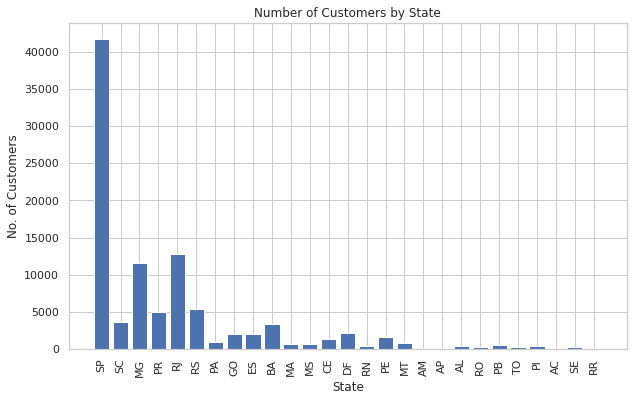

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cur is the cursor object from your MySQL connection

query = """SELECT customer_state, COUNT(customer_state) FROM customers GROUP BY customer_state"""
cur.execute(query)
d = cur.fetchall()


df = pd.DataFrame(d, columns=["State", "No. of Customers"])
df.sort_values(by = "No. of Customers", ascending = False)

plt.figure(figsize=(10, 6))
plt.bar(df["State"], df["No. of Customers"])
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("No. of Customers")
plt.title("Number of Customers by State")

plt.show()

# Calculate the number of orders per month in 2018.

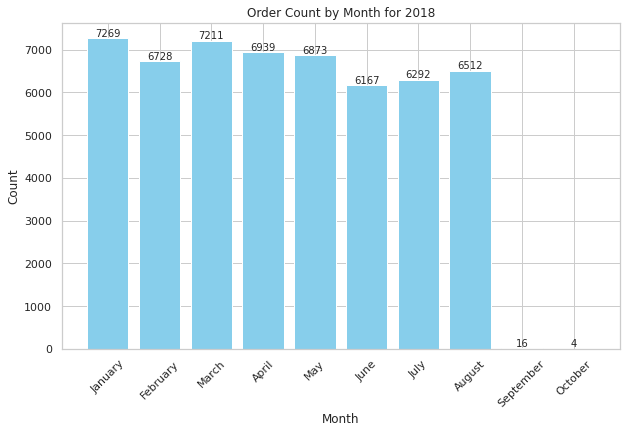

In [20]:
query = """select monthname(order_purchase_timestamp) as months , count(order_id) as counts from
orders where year(order_purchase_timestamp) = '2018' group by months"""
cur.execute(query)
d = cur.fetchall()
d
df = pd.DataFrame(d, columns=["Month", "Count"])

o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]


df['Month'] = pd.Categorical(df['Month'], categories=o, ordered=True)


df = df.sort_values('Month')


plt.figure(figsize=(10, 6))
bars = plt.bar(df["Month"], df["Count"], color='skyblue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Order Count by Month for 2018")
plt.show()

# Find the average number of products per order, grouped by customer city.

In [60]:
query = """with count_per_order as (select order_items.order_id , orders.customer_id , count(order_items.order_id) as oc from order_items join orders on
order_items.order_id = orders.order_id group by order_items.order_id , orders.customer_id)

select customers.customer_city , avg(count_per_order.oc) from customers join count_per_order on
customers.customer_id = count_per_order.customer_id group by customers.customer_city"""
cur.execute(query)
d = cur.fetchall()
d
df = pd.DataFrame(d, columns=["Customer City", "Avg. No of Orders"])
df

,Customer City,Avg. No of Orders
0,sao paulo,1.1562
1,sao jose dos campos,1.1385
2,porto alegre,1.1749
3,indaial,1.1154
4,treze tilias,1.2727
...,...,...
4105,japaratuba,1.0000
4106,sebastiao leal,1.0000
4107,buriti,3.0000
4108,morro agudo de goias,1.0000


# Calculate the percentage of total revenue contributed by each product category.

In [61]:
query = """select products.product_category , round(sum(payments.payment_value) / (
select round(sum(payment_value),2) from payments
)*100,2) as sum from products join order_items on
products.product_id = order_items.product_id join payments on payments.order_id = order_items.order_id
group by products.product_category order by sum desc"""
cur.execute(query)
d = cur.fetchall()
d
df = pd.DataFrame(d, columns=["Category", "Avg. No of Revenue"])
df

,Category,Avg. No of Revenue
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
...,...,...
69,House Comfort 2,0.01
70,cds music dvds,0.01
71,PC Gamer,0.01
72,Fashion Children's Clothing,0.00


# Identify the correlation between product price and the number of times a product has been purchased.

In [25]:
import numpy as np
query = """select products.product_category , count(order_items.order_id) as count , round(avg(order_items.price),2) as price
from products join order_items on products.product_id = order_items.product_id
group by products.product_category"""
cur.execute(query)
d = cur.fetchall()
d

df = pd.DataFrame(d , columns = [ "Product Cateogry" , "Count" , "Price"])


arr1 = df["Count"]
arr2 = df["Price"]

print("The Correlation Matrix is : " , np.corrcoef(arr1,arr2) ) 


The Correlation Matrix is :  [[ 1.         -0.10631514]
 [-0.10631514  1.        ]]


# Calculate the total revenue generated by each seller, and rank them by revenue.

DataFrame is : 


,Seller Id,Payment,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,3076
3091,702835e4b785b67a084280efca355756,18.56,3077
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,3078
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,3079


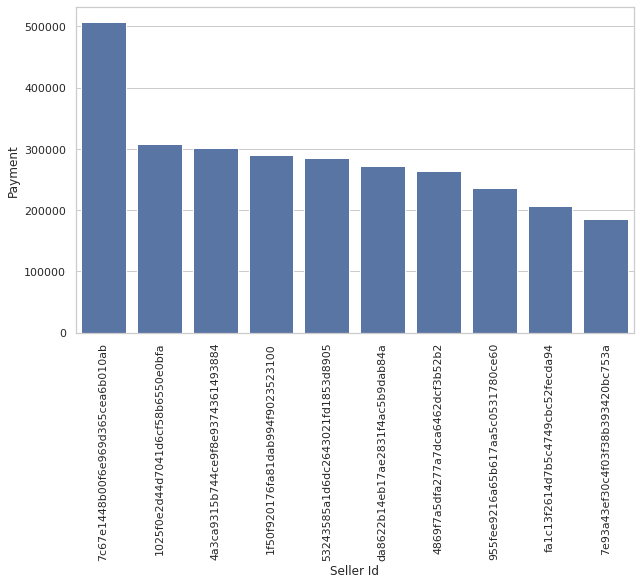

In [70]:
query = """select sellers.seller_id , round(sum(payments.payment_value),2) ,
dense_rank() over( order by round(sum(payments.payment_value),2) desc ) as ranlk from sellers
join order_items on
sellers.seller_id = order_items.seller_id join payments on payments.order_id = order_items.order_id
group by sellers.seller_id"""
cur.execute(query)
d = cur.fetchall()
d

df = pd.DataFrame(d , columns = [ "Seller Id" , "Payment" , "Rank"])
df.head(10)
plt.figure(figsize=(10, 6))
sb.barplot( x = "Seller Id" , y = "Payment" , data = df.head(10) )
plt.xticks(rotation=90)

print("DataFrame is : ")
df

# Calculate the moving average of order values for each customer over their order history.

In [64]:
query = """select customer_id , order_purchase_timestamp , payment , avg(payment) over( partition by customer_id order by
order_purchase_timestamp rows between 2 preceding and current row ) as mov_avg from
(select orders.customer_id , orders.order_purchase_timestamp , payments.payment_value as payment from
orders join payments on orders.order_id = payments.order_id) as a"""
cur.execute(query)
d = cur.fetchall()
d

df = pd.DataFrame(d , columns = [ "Customer Id" , "Time" , "Payment" ,"Avg. Payment"])

print("DataFrame is : ")
df

DataFrame is : 


,Customer Id,Time,Payment,Avg. Payment
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year.

DataFrame is : 


,Years,Months,Cummi. Payment
0,2016,9,252.24
1,2016,10,59342.72
2,2016,12,59362.34
3,2017,1,197850.38
4,2017,2,489758.39
5,2017,3,939621.99
6,2017,4,1357410.02
7,2017,5,1950328.84
8,2017,6,2461605.22
9,2017,7,3053988.14


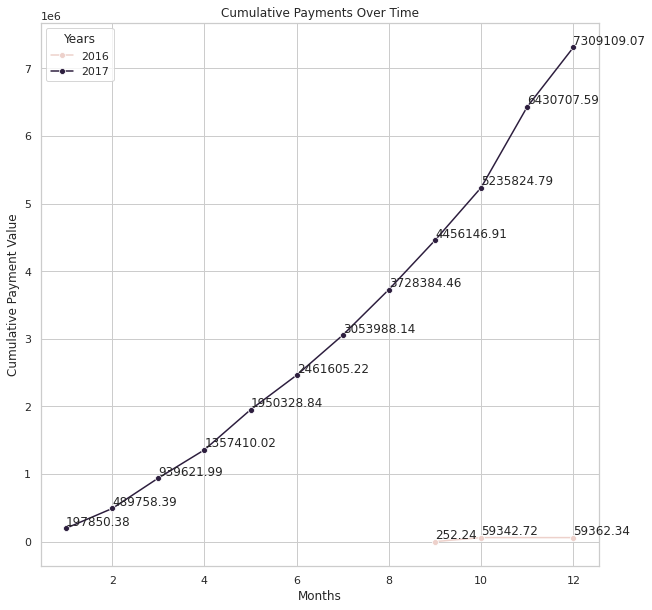

In [68]:
import seaborn as sns

query = """
select Years, Months, ROUND(sum(payment) over(order by Years, Months), 2) as x 
from (
    select year(orders.order_purchase_timestamp) as Years, 
           month(orders.order_purchase_timestamp) as Months,
           sum(payments.payment_value) as payment 
    from orders 
    join payments on orders.order_id = payments.order_id
    group by YEAR(orders.order_purchase_timestamp), 
             MONTH(orders.order_purchase_timestamp)
    order by Years, Months
) as s
"""
cur.execute(query)
d = cur.fetchall()
d

df = pd.DataFrame(d , columns = [ "Years" , "Months" ,"Cummi. Payment"])
sns.set(style="whitegrid")


plt.figure(figsize=(10, 10))
sns.lineplot(data=df.head(15), x='Months', y='Cummi. Payment', hue='Years', marker="o", dashes=False)


plt.title('Cumulative Payments Over Time')
plt.xlabel('Months')
plt.ylabel('Cumulative Payment Value')


for i in range(len(df.head(15))):
    plt.text(x=df.head(15).iloc[i]['Months'], 
             y=df.head(15).iloc[i]['Cummi. Payment'], 
             s=f"{df.head(15).iloc[i]['Cummi. Payment']:.2f}",
             horizontalalignment='left',
             verticalalignment='bottom')

# Show plot
print("DataFrame is : ")
df

# Calculate the year-over-year growth rate of total sales.

Dataframe is : 


,Years,YoY % Growth
0,2016,NaN
1,2017,12112.703760
2,2018,20.000924


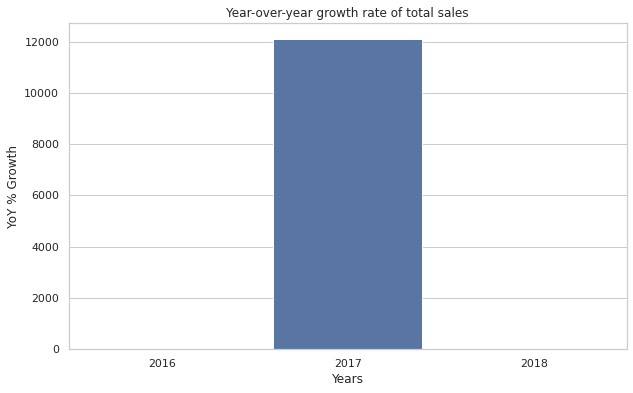

In [69]:
query = """
with a as( select year(orders.order_purchase_timestamp) as Years
, sum(payments.payment_value) as payment from
orders join payments on orders.order_id = payments.order_id
group by YEAR(orders.order_purchase_timestamp)
order by Years)

select years, (( payment - lag(payment, 1) over( order by years ) ) /
lag(payment, 1) over( order by years ))*100  from a
"""
cur.execute(query)
d = cur.fetchall()
d

df = pd.DataFrame(d , columns = [ "Years" , "YoY % Growth"])
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot( x='Years', y='YoY % Growth', data=df )


plt.title('Year-over-year growth rate of total sales')
plt.xlabel('Years')
plt.ylabel('YoY % Growth')

# Show plot
print("Dataframe is : " )
df
# plt.show()

# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [48]:
query = """
with a as (select customers.customer_id, min(orders.order_purchase_timestamp) first_order
from customers join orders on
customers.customer_id = orders.customer_id group by
customers.customer_id ),

b as ( select a.customer_id , count( distinct orders.order_purchase_timestamp ) 
from a join orders on orders.customer_id = a.customer_id 
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order , interval 6 month )
group by a.customer_id )

select 100 * ( count( distinct a.customer_id ) / count( distinct b.customer_id ) )
from a left join b on a.customer_id = b.customer_id
"""
cur.execute(query)
d = cur.fetchall()
d


[(None,)]

# Identify the top 3 customers who spent the most money in each year.

Data Frame is : 


,Year,Customer_id,Payment,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


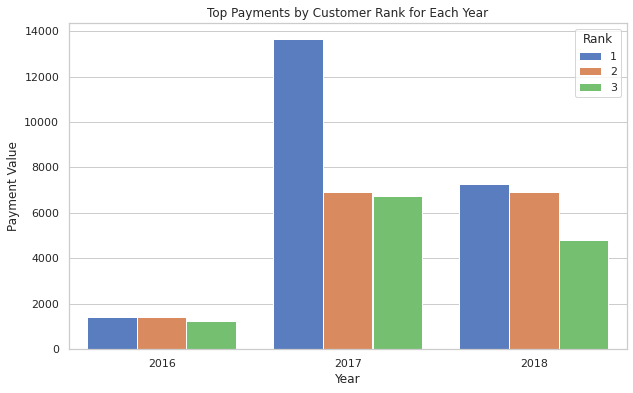

In [66]:
query = """
with ad as (select year(orders.order_purchase_timestamp) as yrs,
orders.customer_id as id,
sum(payments.payment_value) as pay,
dense_rank() over( partition by
year(orders.order_purchase_timestamp) order by
sum(payments.payment_value) desc ) d_rank  
from orders join payments on
orders.order_id = payments.order_id group by yrs,
orders.customer_id)

select ad.yrs , ad.id , ad.pay , ad.d_rank from ad where d_rank <= 3
"""
cur.execute(query)
d = cur.fetchall()
d
df = pd.DataFrame( d , columns = [ "Year" , "Customer_id" , "Payment" , "Rank" ] )

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Payment', hue='Rank', data=df, palette='muted')

plt.title('Top Payments by Customer Rank for Each Year')
plt.xlabel('Year')
plt.ylabel('Payment Value')


print( "Data Frame is : " )
df
# plt.show()